# Graph State Benchmark Example

In [1]:
%load_ext autoreload
%autoreload 2

# Choose (or define) a backend

In [2]:
#backend = "fakeadonis"
#backend = "fakeapollo"
#backend = "garnet"

**Set IQM Token if using Resonance.**

In [7]:
import os
token = "XXXXXXXXXXXXXX"
os.environ["IQM_TOKEN"] = token

from iqm.benchmarks.utils import get_iqm_backend
backend=get_iqm_backend("garnet")

# from iqm.qiskit_iqm.iqm_provider import IQMProvider
# iqm_url="https://cocos.resonance.meetiqm.com/garnet"
# provider = IQMProvider(iqm_url)
# backend = provider.get_backend()

In [8]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# Graph State Configuration

In [9]:
from iqm.benchmarks.entanglement.graph_states import *

In [11]:
EXAMPLE_GRAPHSTATE = GraphStateConfiguration(
    qubits=list(range(backend.num_qubits)),
    shots=2**12,
    tomography="state_tomography",
    num_bootstraps = 150,
    # n_random_unitaries=25,
    # n_median_of_means=4,
    #max_gates_per_batch=40_000,
)

In [12]:
benchmark_graphstate = GraphStateBenchmark(backend, EXAMPLE_GRAPHSTATE)
run_graphstate = benchmark_graphstate.run()

2025-03-21 11:02:57,313 - iqm.benchmarks.logging_config - INFO - Identifying qubit pairs and neighbor groups for the Graph State benchmark
2025-03-21 11:02:57,315 - iqm.benchmarks.logging_config - INFO - Performing state tomography of all qubit pairs
2025-03-21 11:02:57,315 - iqm.benchmarks.logging_config - INFO - Now on group 1/10
2025-03-21 11:02:57,316 - iqm.benchmarks.logging_config - INFO - Now on qubit pair (11, 10) and neighbors {5, 6, 9, 15, 16}
2025-03-21 11:02:57,322 - iqm.benchmarks.logging_config - INFO - Now on qubit pair (18, 17) and neighbors {13, 14, 19}
2025-03-21 11:02:57,329 - iqm.benchmarks.logging_config - INFO - Now on qubit pair (7, 12) and neighbors {2, 8, 13}
2025-03-21 11:02:57,336 - iqm.benchmarks.logging_config - INFO - Now on qubit pair (3, 4) and neighbors {0, 1, 2, 5, 8, 9}
2025-03-21 11:02:57,341 - iqm.benchmarks.logging_config - INFO - Submitting batch with 36 circuits corresponding to qubits [11, 10, 18, 17, 7, 12, 3, 4]
C:\Users\PedroFigueroaRomero\an

In [86]:
result_graphstate = benchmark_graphstate.analyze()

2025-03-21 11:29:41,329 - iqm.benchmarks.logging_config - INFO - Fetching dataset
2025-03-21 11:29:41,444 - iqm.benchmarks.logging_config - INFO - Dataset imported OK
2025-03-21 11:29:41,445 - iqm.benchmarks.logging_config - INFO - Retrieving tomography-reconstructed states with 150 for qubit-pair group 1/10
2025-03-21 11:29:42,696 - iqm.benchmarks.logging_config - INFO - Retrieving tomography-reconstructed states with 150 for qubit-pair group 2/10
2025-03-21 11:29:44,075 - iqm.benchmarks.logging_config - INFO - Retrieving tomography-reconstructed states with 150 for qubit-pair group 3/10
2025-03-21 11:29:45,322 - iqm.benchmarks.logging_config - INFO - Retrieving tomography-reconstructed states with 150 for qubit-pair group 4/10
2025-03-21 11:29:46,220 - iqm.benchmarks.logging_config - INFO - Retrieving tomography-reconstructed states with 150 for qubit-pair group 5/10
2025-03-21 11:29:47,117 - iqm.benchmarks.logging_config - INFO - Retrieving tomography-reconstructed states with 150 f

In [87]:
for idx, o in enumerate(result_graphstate.observations):
    if idx == 0:
        print(f"Observations: {o.name}\n****************************\n")
    print(f"{o.identifier.qubit_indices}: {100.0*(o.value/0.5):.2f} +/- {100.0*(o.uncertainty/0.5):.2f} %")

Observations: max_negativity
****************************

(11, 10): 67.71 +/- 5.01 %
(18, 17): 66.48 +/- 2.70 %
(7, 12): 69.49 +/- 2.81 %
(3, 4): 81.60 +/- 8.02 %
(13, 8): 72.15 +/- 7.25 %
(11, 16): 74.77 +/- 2.28 %
(5, 4): 71.37 +/- 5.21 %
(18, 19): 69.71 +/- 2.67 %
(1, 0): 83.22 +/- 1.23 %
(13, 14): 78.54 +/- 7.20 %
(5, 10): 60.77 +/- 6.47 %
(7, 2): 3.32 +/- 3.08 %
(15, 16): 61.68 +/- 4.19 %
(5, 6): 72.45 +/- 2.51 %
(9, 8): 85.99 +/- 7.76 %
(11, 6): 75.76 +/- 2.11 %
(9, 14): 71.30 +/- 10.96 %
(3, 0): 75.77 +/- 4.05 %
(15, 19): 61.52 +/- 4.98 %
(13, 17): 69.60 +/- 3.43 %
(9, 4): 71.77 +/- 8.21 %
(3, 2): 7.27 +/- 4.35 %
(15, 14): 65.21 +/- 8.73 %
(9, 10): 71.13 +/- 10.21 %
(13, 12): 67.57 +/- 4.26 %
(15, 10): 75.39 +/- 9.43 %
(3, 8): 74.77 +/- 9.16 %
(7, 8): 75.00 +/- 4.44 %
(1, 4): 80.20 +/- 3.20 %
(18, 14): 62.78 +/- 6.02 %


**Inspect the available plots**

In [88]:
result_graphstate.plots.keys()

dict_keys(['(11, 10)', '(18, 17)', '(7, 12)', '(3, 4)', '(13, 8)', '(11, 16)', '(5, 4)', '(18, 19)', '(1, 0)', '(13, 14)', '(5, 10)', '(7, 2)', '(15, 16)', '(5, 6)', '(9, 8)', '(11, 6)', '(9, 14)', '(3, 0)', '(15, 19)', '(13, 17)', '(9, 4)', '(3, 2)', '(15, 14)', '(9, 10)', '(13, 12)', '(15, 10)', '(3, 8)', '(7, 8)', '(1, 4)', '(18, 14)', 'max_negativities_IQM Backend_20250321-110257', 'max_negativities_graph_20250321-110257'])

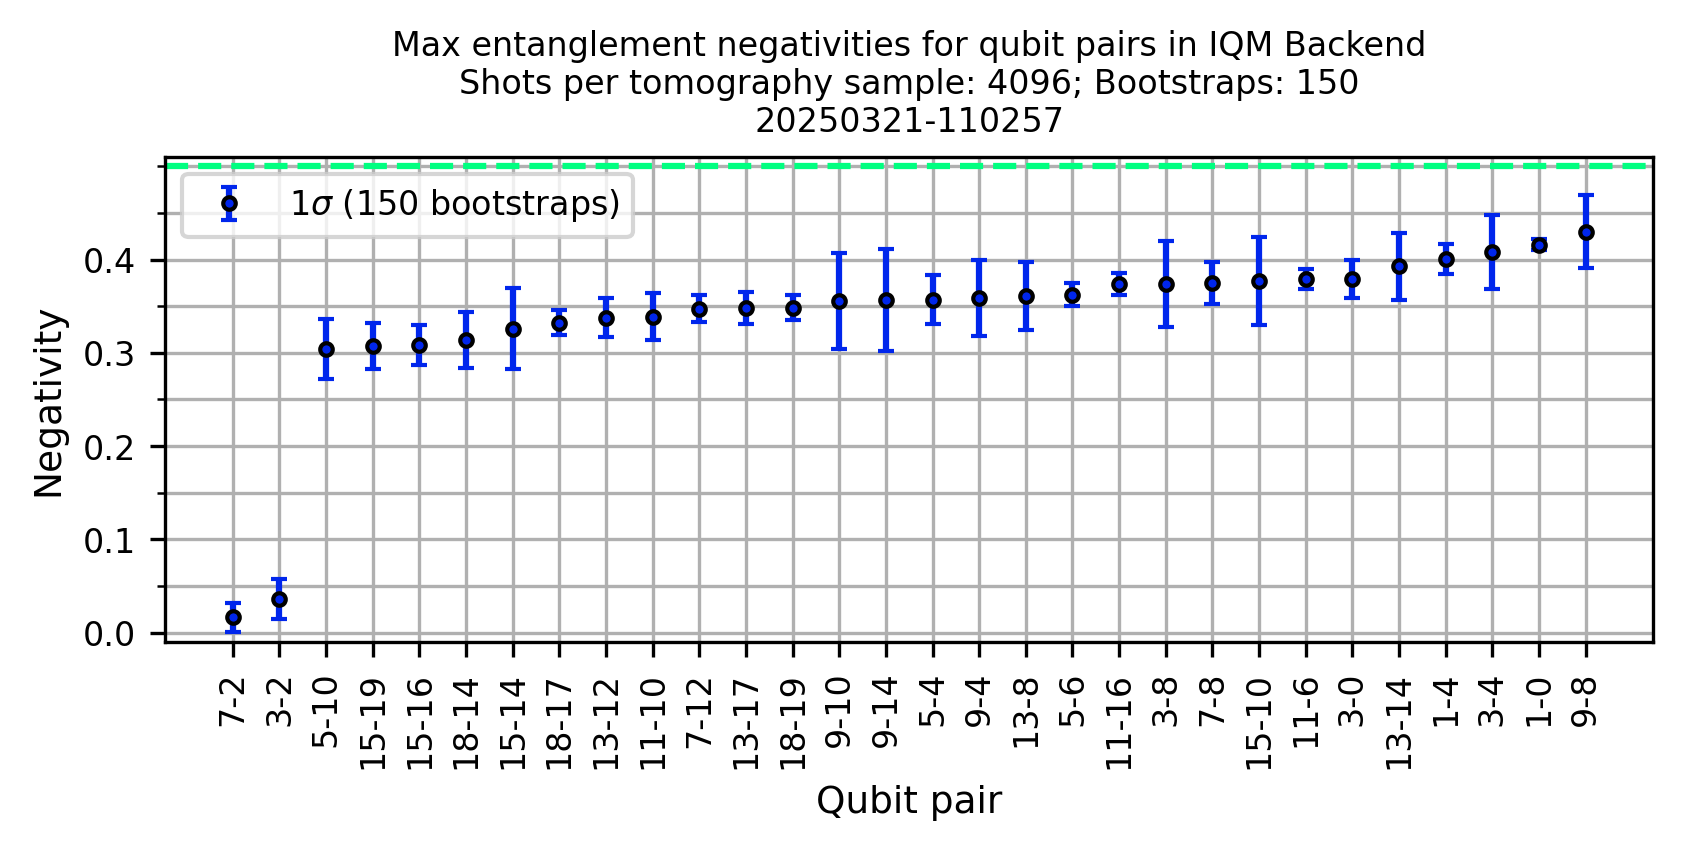

In [89]:
result_graphstate.plots["max_negativities_IQM Backend_20250321-110257"]

**Plot the best and worst negativity resconstructed density matrices**

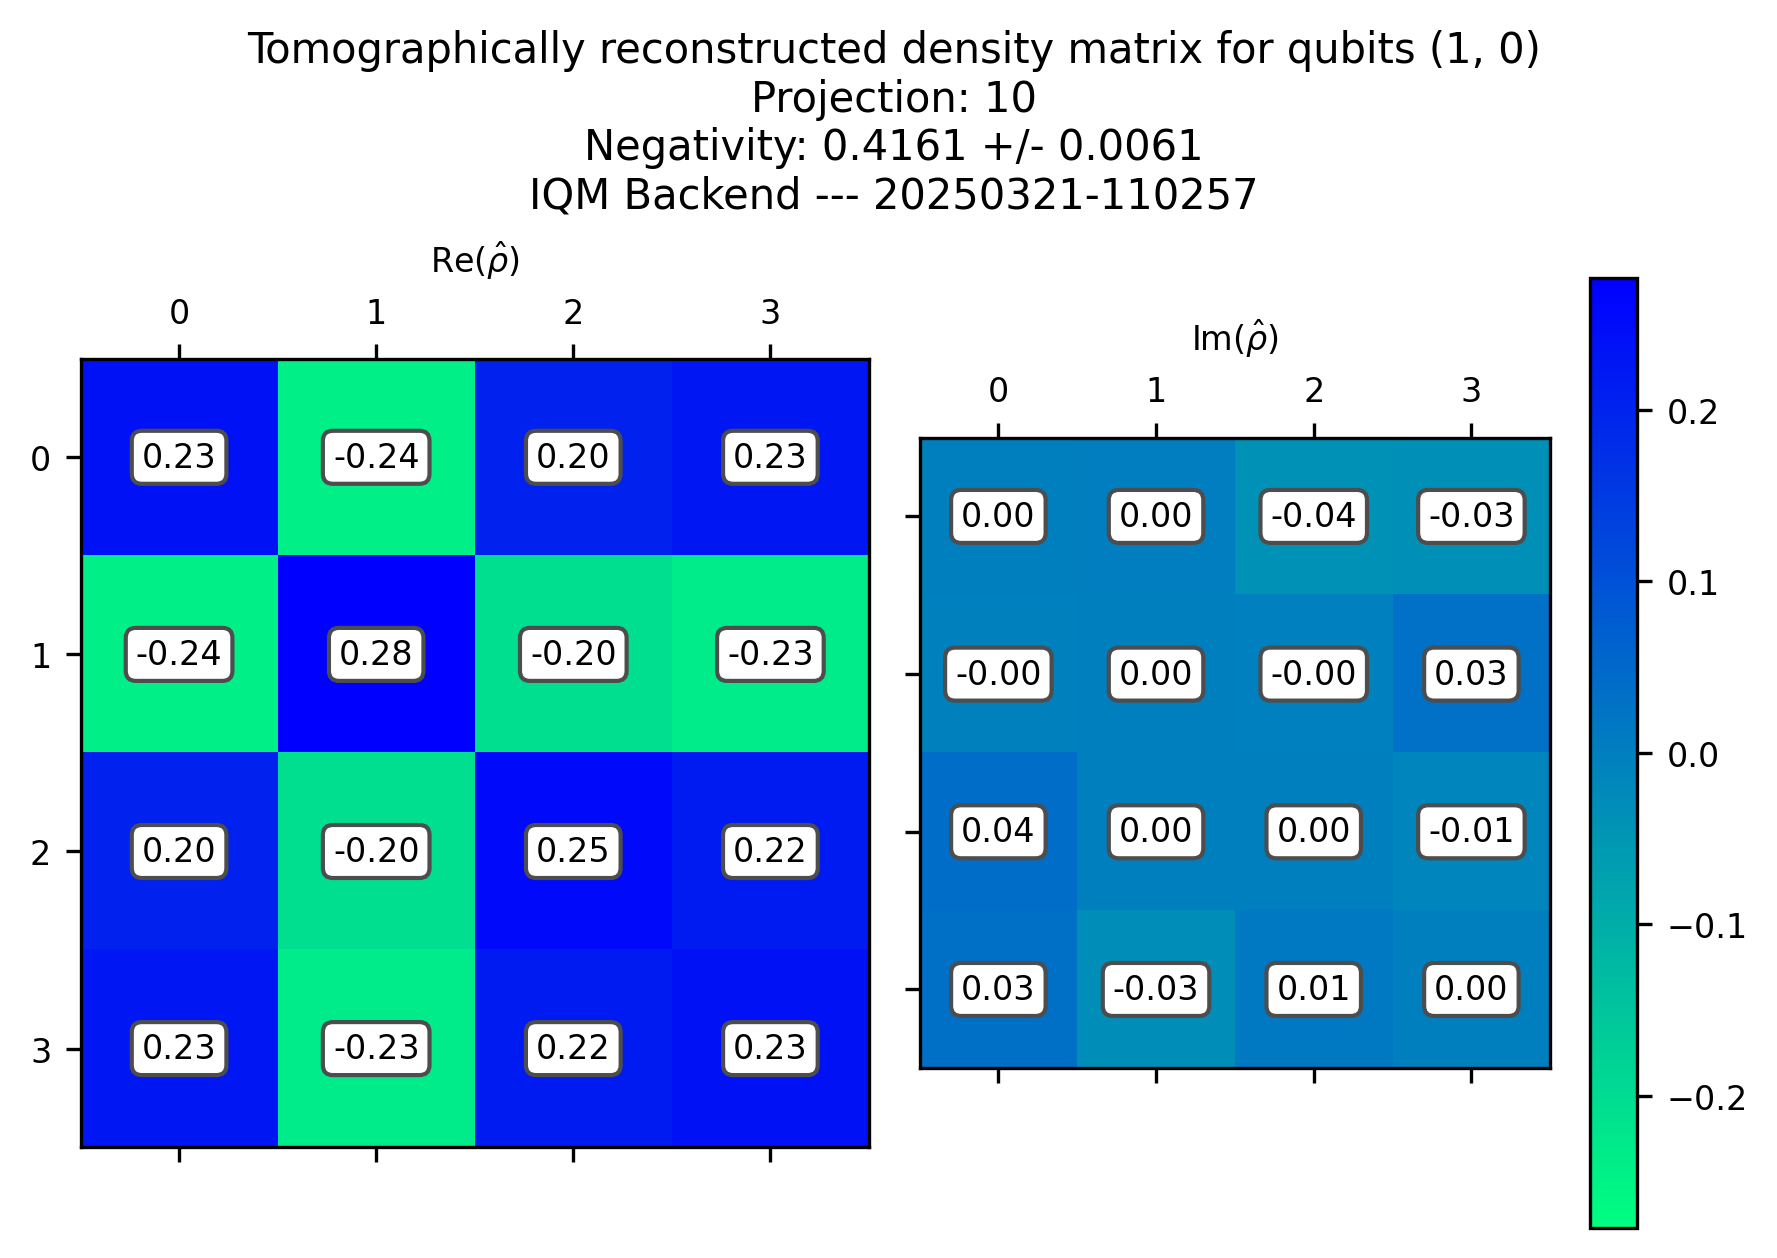

In [90]:
result_graphstate.plots["(1, 0)"]

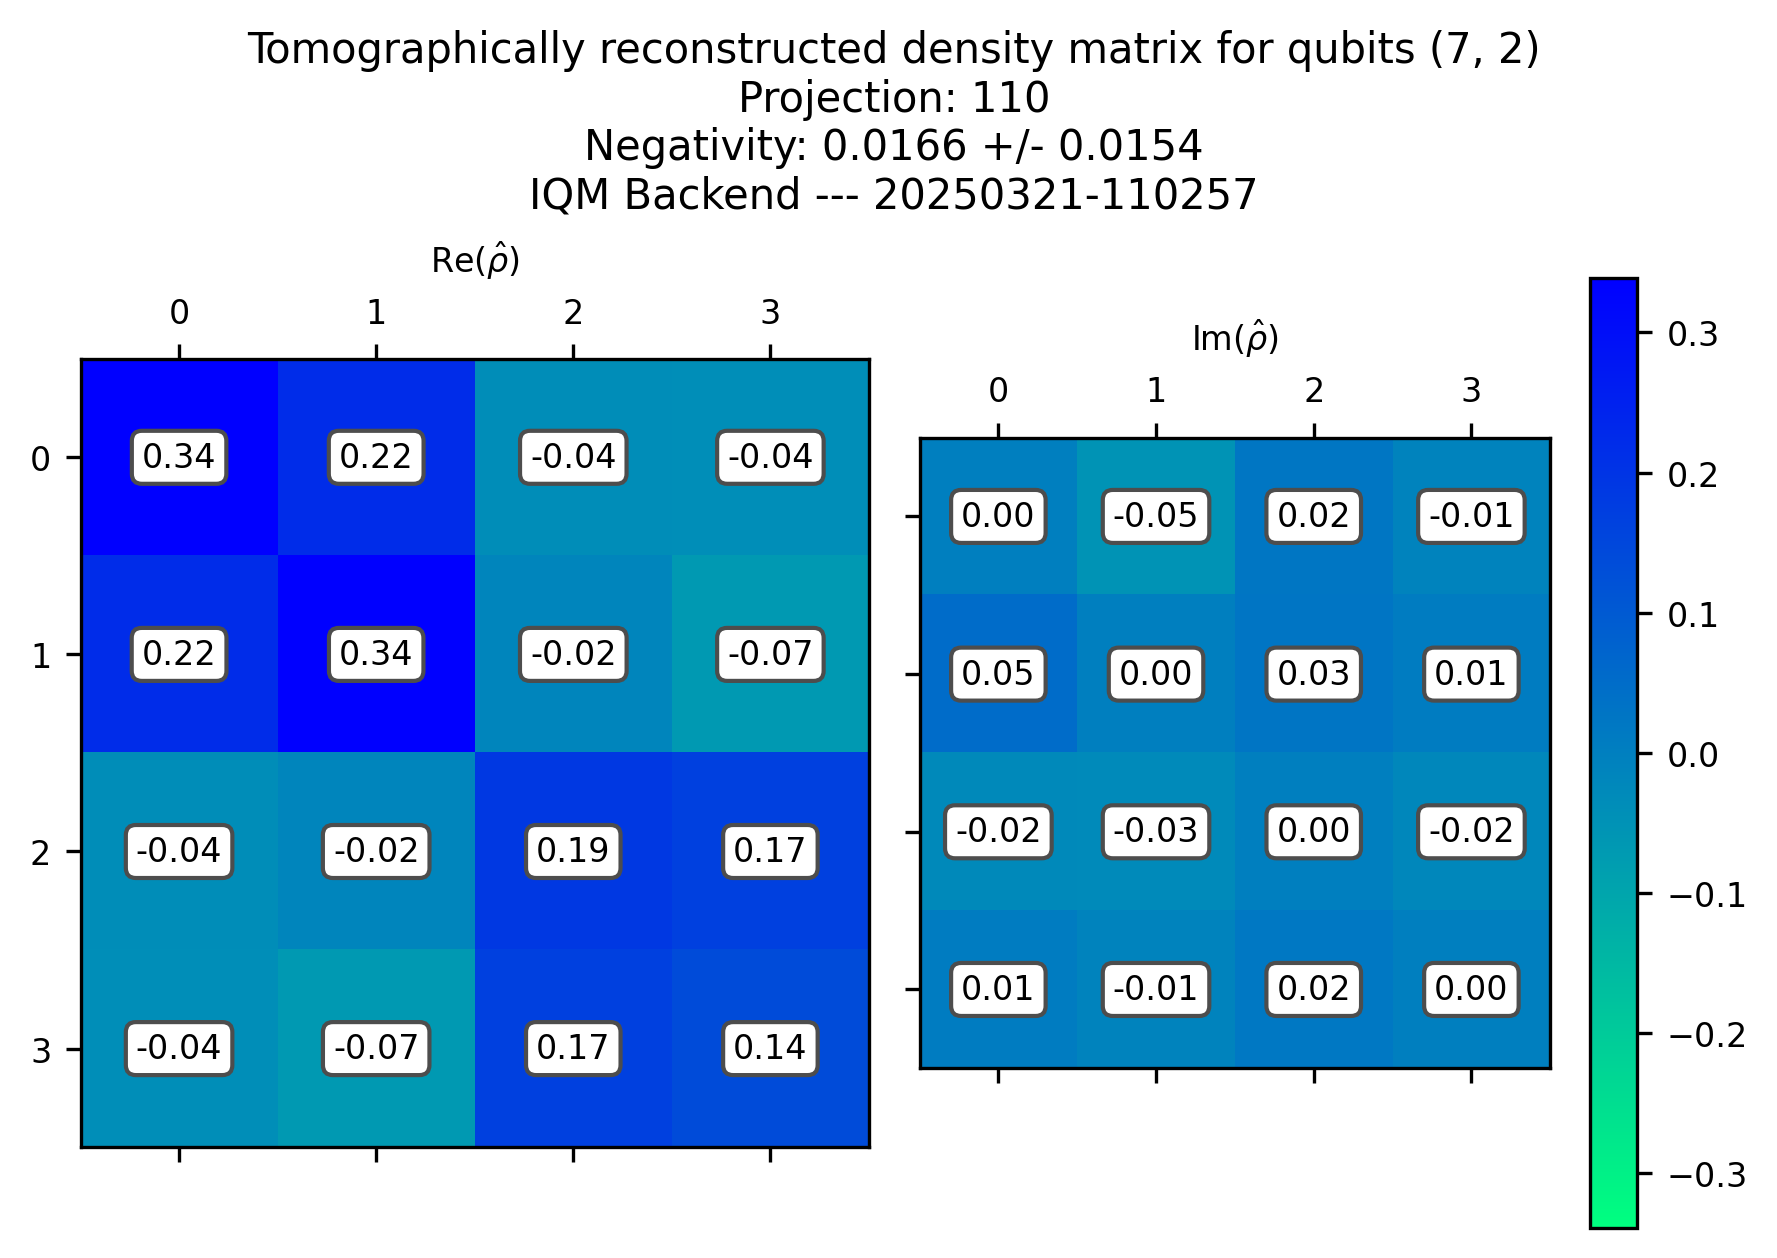

In [91]:
result_graphstate.plots["(7, 2)"]

**Display max negativities in the backend graph**

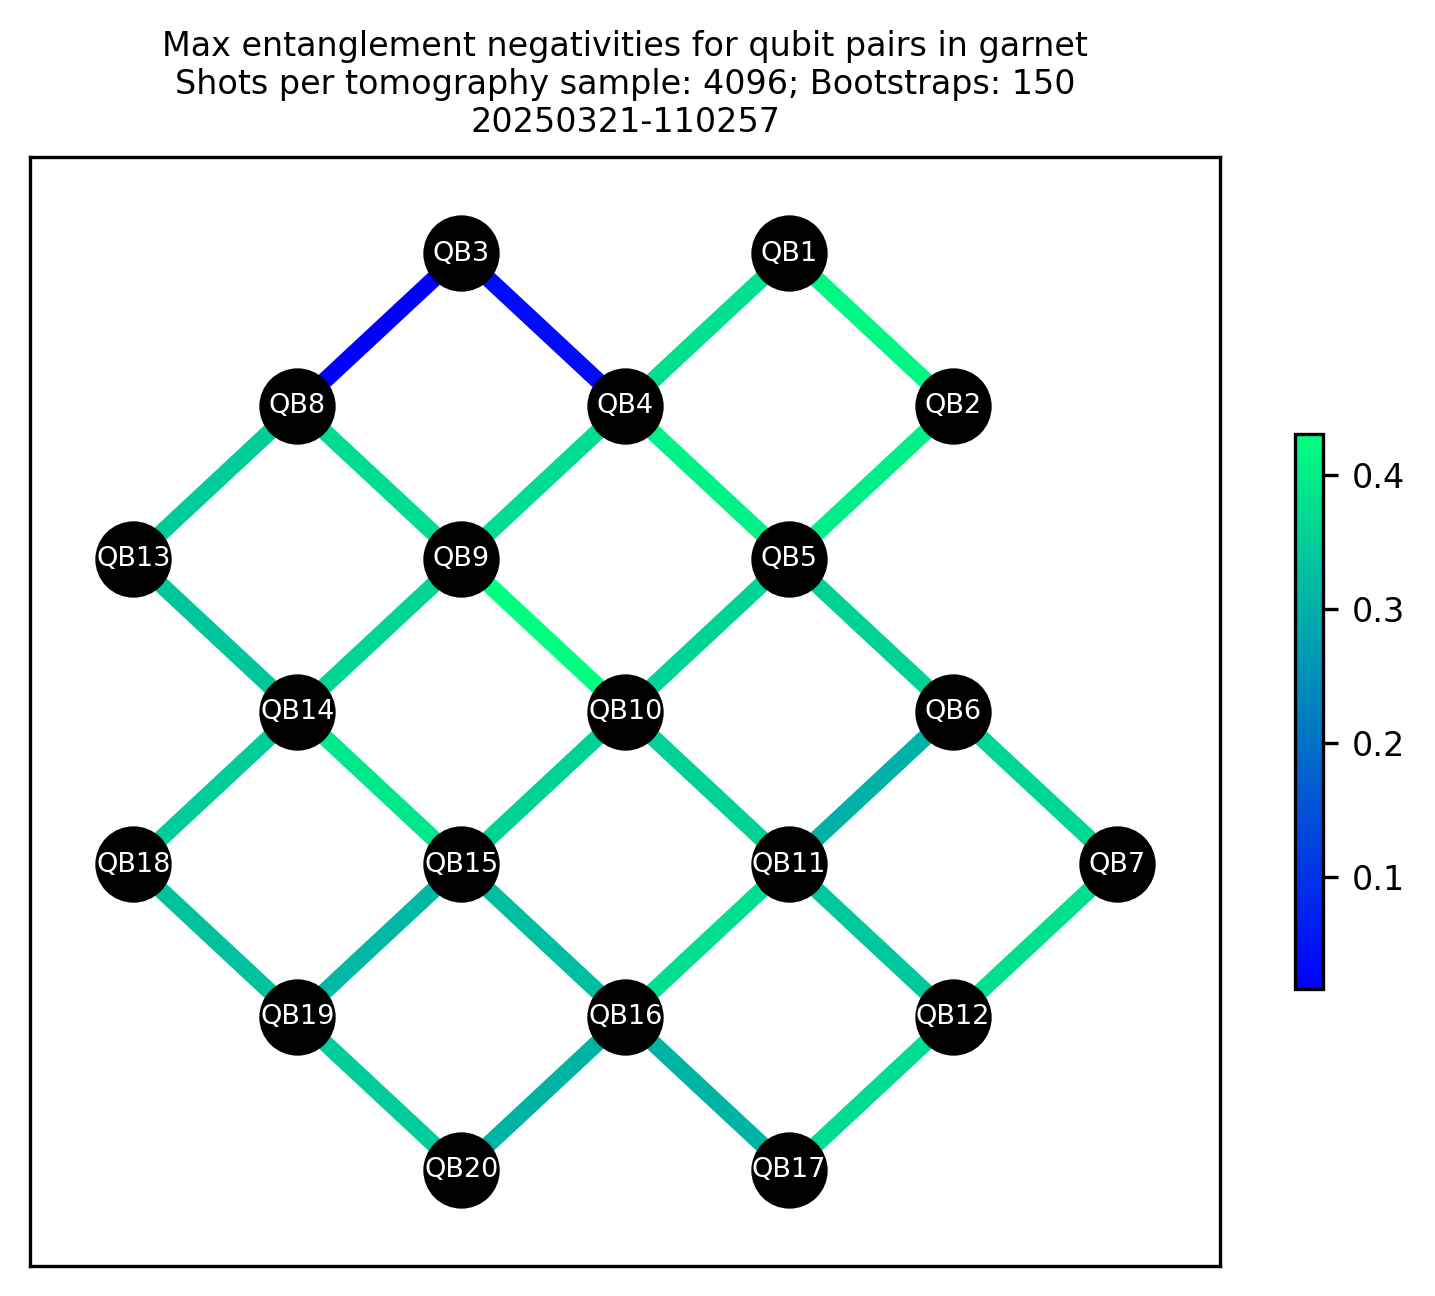

In [92]:
result_graphstate.plots["max_negativities_graph_20250321-110257"]

**All available dataset attributes**

In [93]:
result_graphstate.dataset.attrs.keys()

dict_keys(['session_timestamp', 'execution_timestamp', 'backend_configuration_name', 'backend', 'backend_name', 'benchmark', 'shots', 'max_gates_per_batch', 'max_circuits_per_batch', 'calset_id', 'routing_method', 'physical_layout', 'use_dd', 'dd_strategy', 'qubits', 'tomography', 'num_bootstraps', 'n_random_unitaries', 'n_median_of_means', 'time_circuit_generation', 'all_unprojected_qubits', 'all_projected_qubits', 'all_pair_groups', 'all_neighbor_groups', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'all_tomography_states', 'all_negativities', 'max_negativities'])

**Inspect the bootstrap bias (difference between each bootstrap mean and the measured sample)**

In [94]:
for qubits, x in result_graphstate.dataset.attrs['max_negativities'].items():
    print(f"{qubits} bootstrap bias: {np.abs(x['value'] - x['boostrapped_average']):.2e}")
    print(f"\t (sample) {x['value']} | (adjusted) {(2*x['value'] - x['boostrapped_average'])}")

(11, 10) bootstrap bias: 1.10e-02
	 (sample) 0.33855280494427076 | (adjusted) 0.3275994403245804
(18, 17) bootstrap bias: 1.91e-03
	 (sample) 0.3324129123063264 | (adjusted) 0.3305073986712972
(7, 12) bootstrap bias: 4.35e-03
	 (sample) 0.347455821089164 | (adjusted) 0.34310665735161777
(3, 4) bootstrap bias: 1.19e-02
	 (sample) 0.40801071664817573 | (adjusted) 0.39612831954269917
(13, 8) bootstrap bias: 1.23e-02
	 (sample) 0.36077040328826987 | (adjusted) 0.34848890883228656
(11, 16) bootstrap bias: 2.40e-03
	 (sample) 0.3738360081144866 | (adjusted) 0.37143331493108367
(5, 4) bootstrap bias: 1.21e-02
	 (sample) 0.356855487871548 | (adjusted) 0.34478153373922327
(18, 19) bootstrap bias: 1.59e-03
	 (sample) 0.3485455364359897 | (adjusted) 0.3469577923269062
(1, 0) bootstrap bias: 5.19e-05
	 (sample) 0.41610074314875195 | (adjusted) 0.4160488105043286
(13, 14) bootstrap bias: 7.42e-03
	 (sample) 0.39272261223699956 | (adjusted) 0.3853016993238763
(5, 10) bootstrap bias: 1.07e-02
	 (samp

**All the qubit pair groups generated during execution**

In [95]:
result_graphstate.dataset.attrs["all_neighbor_groups"]

{0: [{5, 6, 9, 15, 16}, {13, 14, 19}, {2, 8, 13}, {0, 1, 2, 5, 8, 9}],
 1: [{3, 7, 9, 12, 14, 17}, {6, 10, 15}, {1, 3, 6, 9, 10}, {14, 15, 17}],
 2: [{3, 4}, {8, 9, 12, 15, 17, 18}, {4, 6, 9, 11, 15}, {3, 8, 12}],
 3: [{10, 11, 14, 19}, {4, 10, 11}, {3, 4, 7, 10, 13, 14}],
 4: [{5, 10, 16}, {4, 8, 10, 13, 15, 18}, {1, 2, 4, 8}],
 5: [{10, 14, 16, 18}, {8, 12, 14, 18}, {1, 3, 5, 8, 10, 14}],
 6: [{0, 4, 7, 8}, {9, 10, 13, 16, 18, 19}],
 7: [{4, 5, 8, 11, 14, 15}, {7, 8, 14, 17}],
 8: [{5, 9, 11, 14, 16, 19}, {0, 2, 4, 7, 9, 13}],
 9: [{2, 3, 9, 12, 13}, {0, 3, 5, 9}, {9, 13, 15, 17, 19}]}

**Inspect a graph state for some particular Pauli measurement**

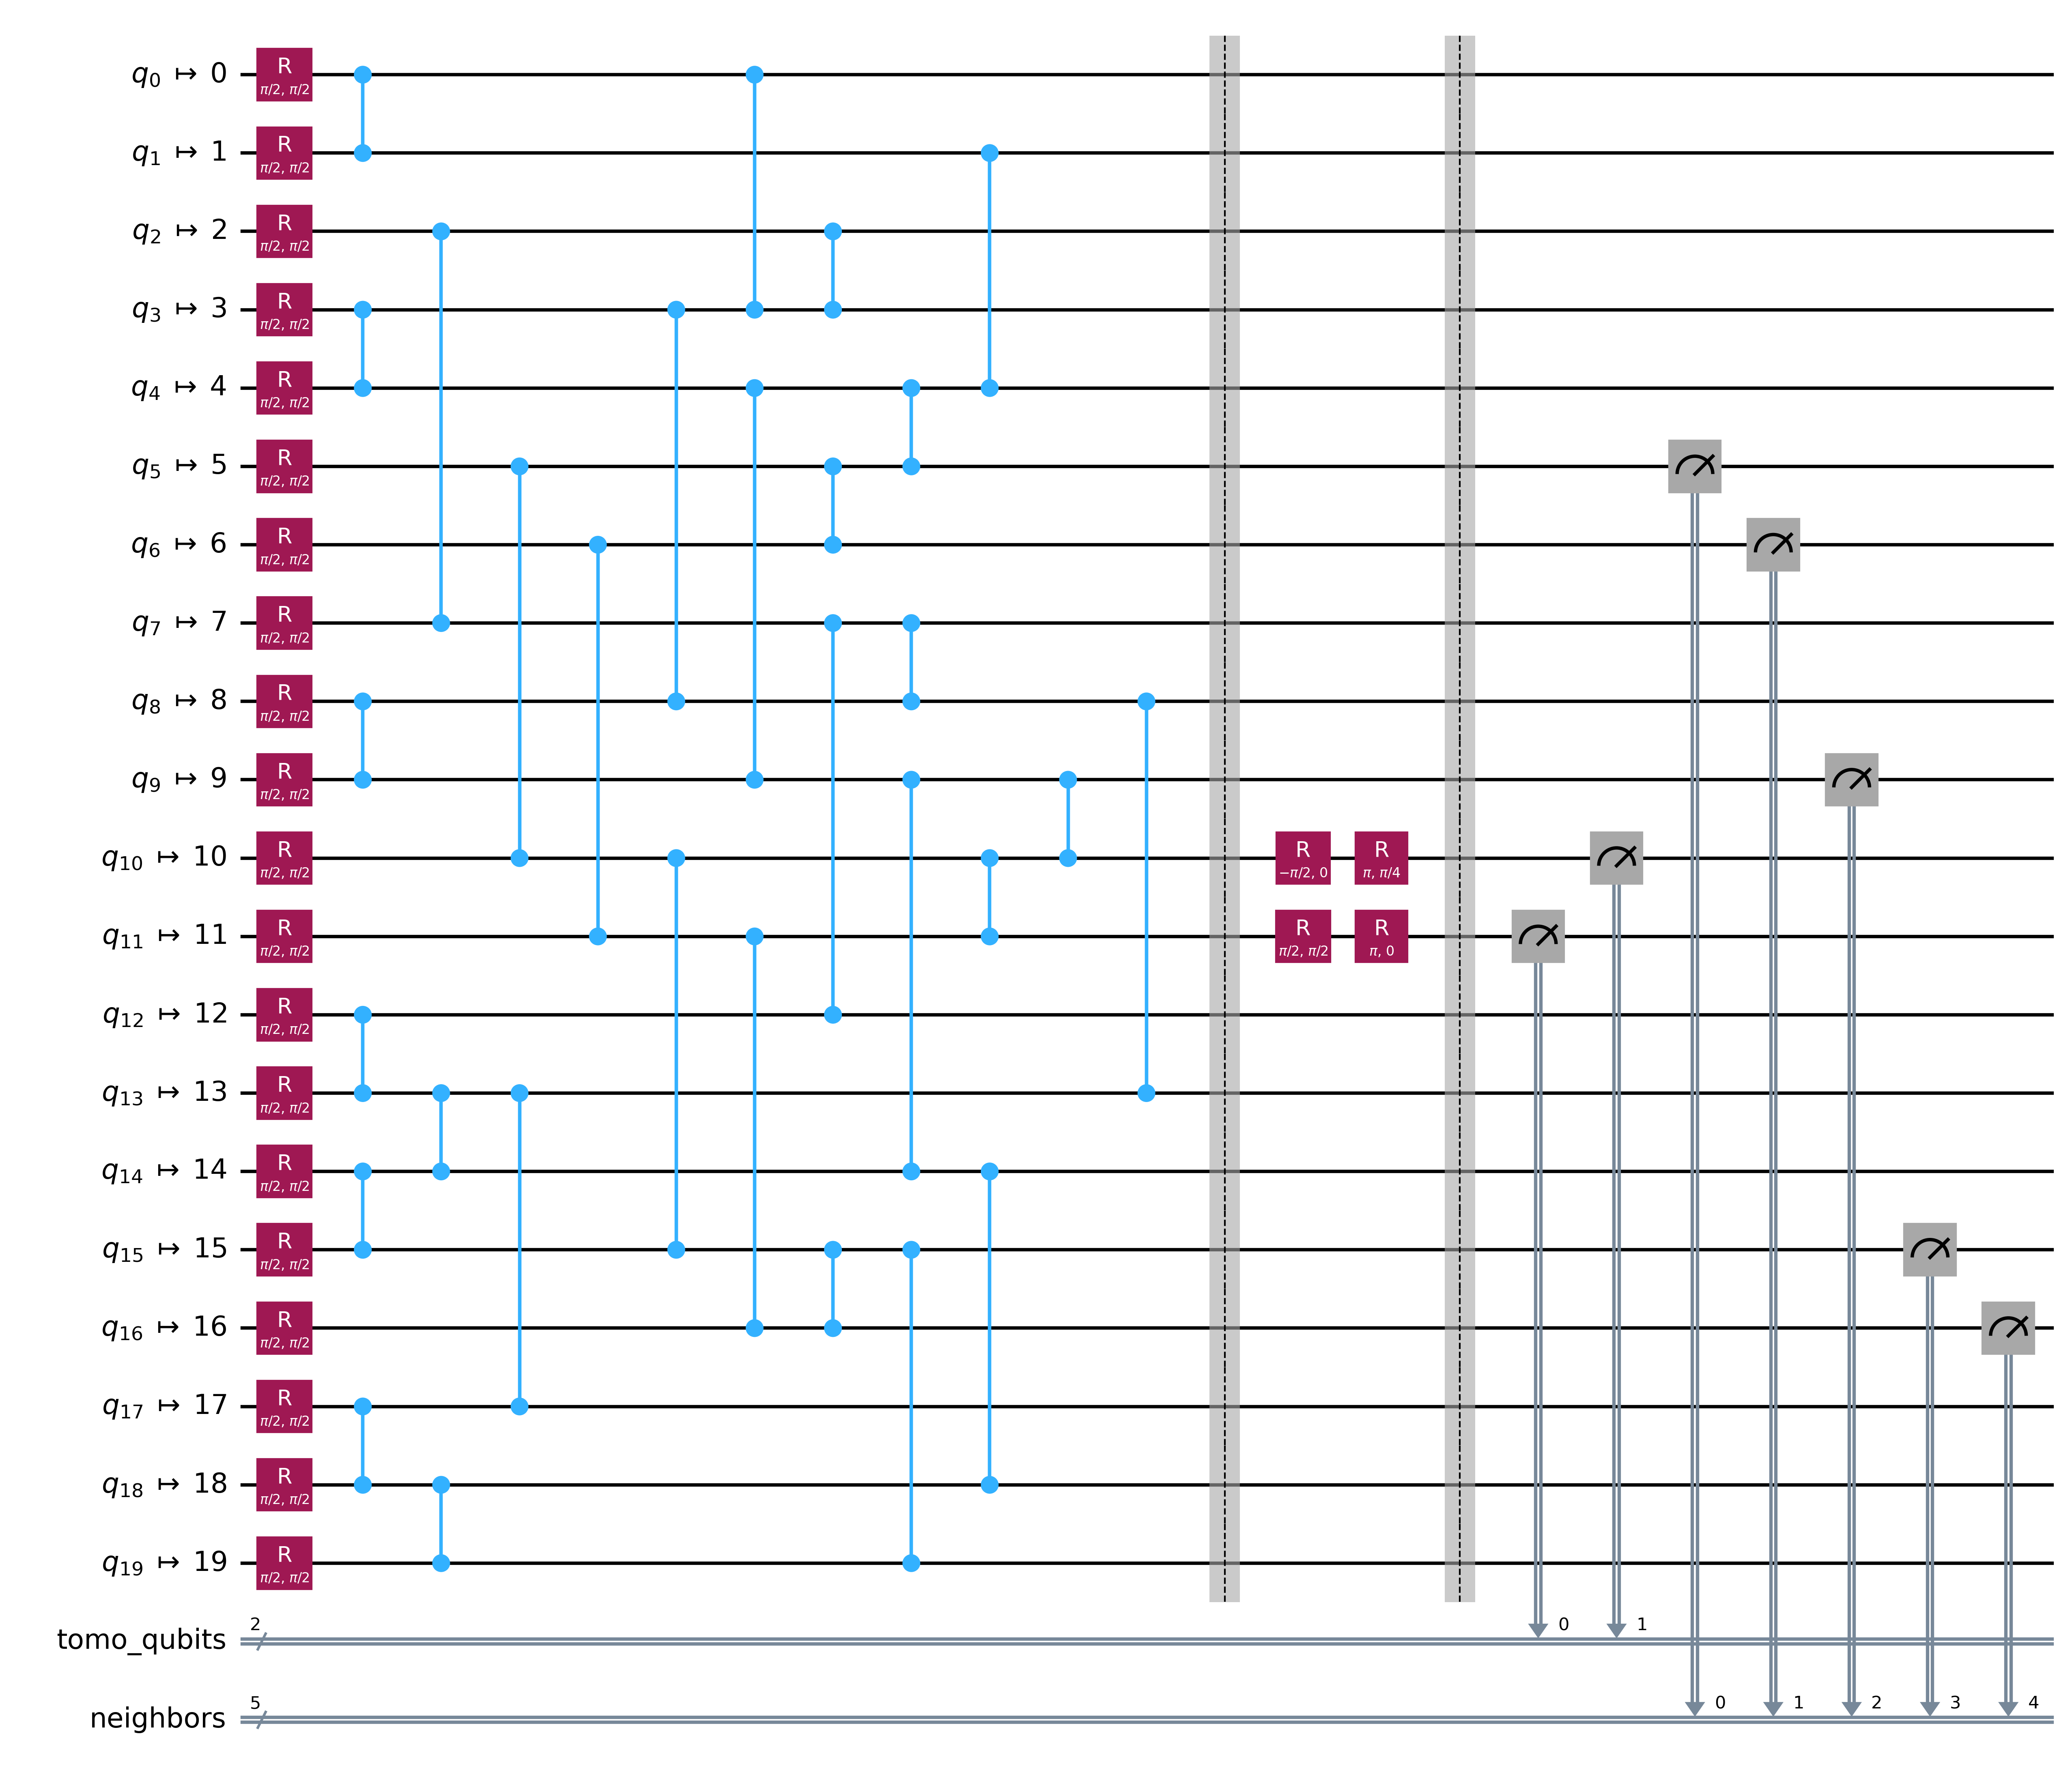

In [96]:
benchmark_graphstate.circuits.benchmark_circuits[0].circuit_groups[0].circuits[7].draw(output='mpl',fold=0,style='iqp')